In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting', True)

In [2]:
rng = np.random.default_rng(seed=123)

In [3]:
def compute_cdf(x):
    cnt = 0
    n = len(x)
    cdf = np.zeros(n)
    min_x = min(x)
    max_x = max(x)
    
    x = sorted(x)
    for i, x_i in enumerate(x):
        
        cnt += 1
        cdf[i] += cnt
    cdf /= n
    return cdf, x

In [4]:
def bootstrapping(x, sizes):  
    n = len(x)
    Tboot = []
    for B_i in sizes:
        Tboot.append([])
        for i in range(B_i):
            Tboot[-1].append(np.median(rng.choice(x, size=n, replace=True)).item())
    return Tboot

In [5]:
def get_conf(Tboot, B):
    conf_left = []
    conf_right = []
    alpha = 1 - 0.95
    for i in range(len(B)):
        conf_left.append(np.quantile(Tboot[i], alpha/2))
        conf_right.append(np.quantile(Tboot[i], 1 - alpha/2))
    return conf_left, conf_right

In [6]:
df = pd.read_excel('./DeathsByState_2019_2020.xlsx', )

In [7]:
df.replace('X', 0, inplace=True)

In [8]:
n_deaths_2019 = df[df['Jahr'] == 2019].drop(columns=['Jahr', 'Bundesland', '29.02.']).sum(0).values
n_deaths_2020 = df[df['Jahr'] == 2020].drop(columns=['Jahr', 'Bundesland']).sum(0).values

date = df.columns[2:]

In [9]:
cdf_2019, x_2019 = compute_cdf(n_deaths_2019)
cdf_2020, x_2020 = compute_cdf(n_deaths_2020)

[]

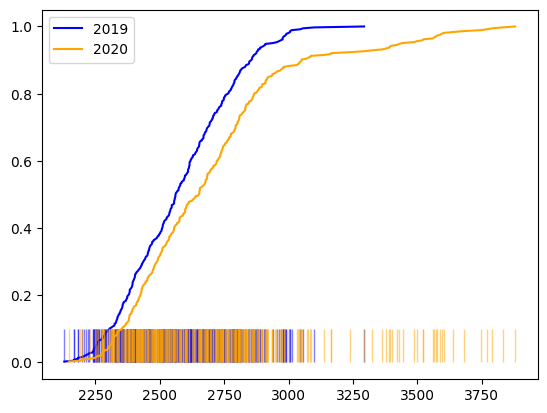

In [10]:
plt.plot(x_2019, cdf_2019, label='2019', color='blue')
plt.vlines(x=x_2019, ymin=0, ymax=0.1, color='blue', linestyles='solid', lw=1, alpha=0.5)

plt.plot(x_2020, cdf_2020, label='2020', color='orange')
plt.vlines(x=x_2020, ymin=0, ymax=0.1, color='orange', linestyles='solid', lw=1, alpha=0.5)
plt.legend()
plt.title('')
plt.plot()

In [11]:
med_2019 = np.median(n_deaths_2019)
med_2020 = np.median(n_deaths_2020)

In [12]:
B = [100, 500, 1000]

In [13]:
Tboot2019 = bootstrapping(n_deaths_2019, B)

In [14]:
Tboot2020 = bootstrapping(n_deaths_2020, B)

In [15]:
conf2019_left, conf2019_right = get_conf(Tboot2019, B)

In [16]:
conf2020_left, conf2020_right = get_conf(Tboot2020, B)

In [17]:
with open('output.txt', 'w') as f:
    for i in range(len(B)):
        line = f'{B[i]}, {conf2019_left[i]}, {conf2019_right[i]}, {conf2020_left[i]}, {conf2020_right[i]}\n'
        f.write(line)

In [18]:
#TODO interpretation